# Final Project Data Analysis & Visualization of different datasets with different methods

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#requirements:
#visualizations,
#1x multiple Regression (BMI ~ GenHealth+PhysHealth+MentHealth), -> Raphael
#1x binary logistic regression (Diabetes ~ BMI + age + (education) + income+GenHealt+PhysHealth+MentHealth ), -> Haluk
#1x Classification (HeartDiseaseorAttack) -> Haluk
#1x Clustering

In [ ]:
#To dos:
#Visualizations
#write reasonings and interpretations
#clean up colab

# Multiple Regression (Dataset Weather)

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSVs/Weather.csv')
df_weather = pd.DataFrame(data)

In [ ]:
df_weather

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83
5,9.222222,13.9587,1016.66,0.85
6,7.733333,12.3648,1016.72,0.95
7,8.772222,14.1519,1016.84,0.89
8,10.822222,11.3183,1017.37,0.82
9,13.772222,12.5258,1017.22,0.72


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       50 non-null     float64
 1   Wind Speed (km/h)     50 non-null     float64
 2   Pressure (millibars)  50 non-null     float64
 3   Humidity              50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
df_weather.dtypes

Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
dtype: object

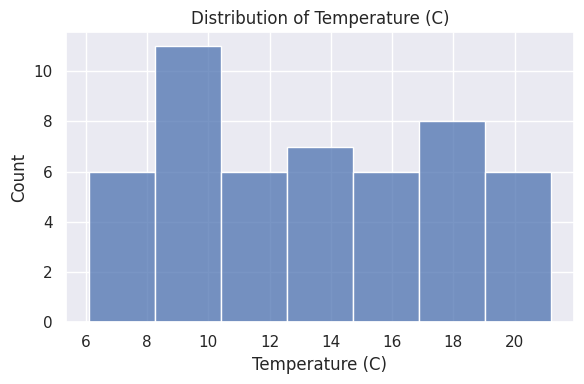

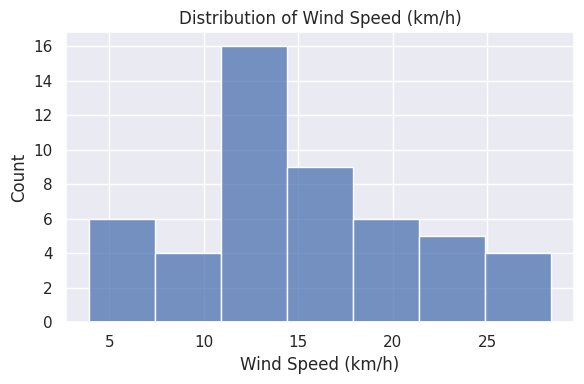

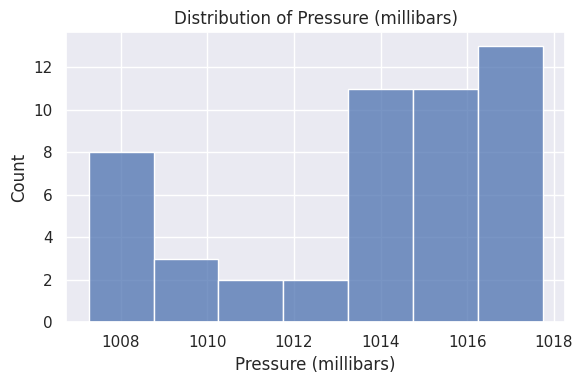

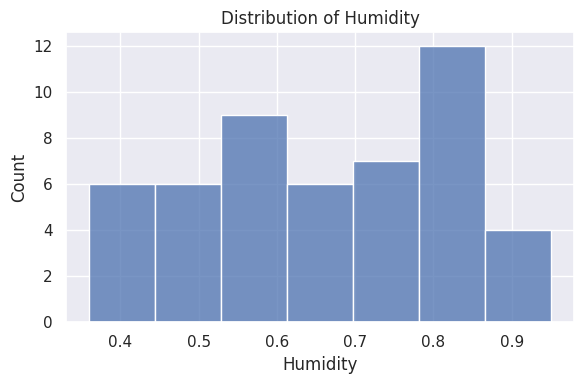

In [ ]:
# Visulizations:
#general distribution

for column in df_weather.select_dtypes(include='number').columns:

    sns.set(style="darkgrid")
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_weather, x=column)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

In [ ]:
df_weather.corr()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
Temperature (C),1.000000,0.710133,-0.335435,-0.943471
Wind Speed (km/h),0.710133,1.000000,-0.447419,-0.749676
Pressure (millibars),-0.335435,-0.447419,1.000000,0.460011
Humidity,-0.943471,-0.749676,0.460011,1.000000


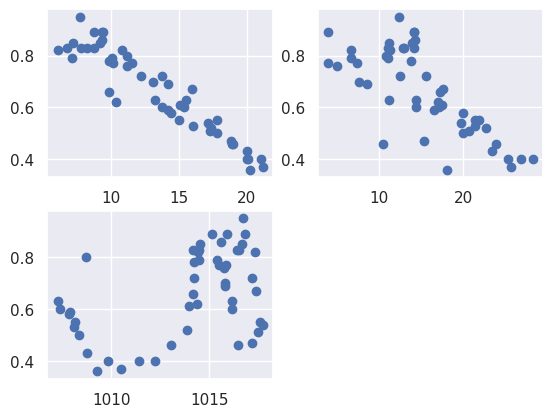

In [ ]:
# check if there is a linear correlation between dependendt and independent variables

# Set the features of model
weather_features = ['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)']

# assign features to x (independent variables)
X = df_weather[weather_features]

# assig target variable to y (dependent variable)
y = df_weather.Humidity

# plt.subplot for multiple graphs
# Three scatter plots for target (humidity) against each feature (temperature, windspeed, pressure)
plt.subplot(2,2,1)
plt.scatter(X['Temperature (C)'],y)

plt.subplot(2,2,2)
plt.scatter(X['Wind Speed (km/h)'],y)

plt.subplot(2,2,3)
plt.scatter(X['Pressure (millibars)'],y)


In [ ]:
# exclude non-linear variables
X = df_weather.drop(columns ='Pressure (millibars)')

# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
#fit model
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
#y intercept
intercept = reg.intercept_
print(intercept)

0.0


In [ ]:
#coefficent
coef = reg.coef_
print(coef)

[-5.84246336e-18  1.38777878e-17  1.00000000e+00]


In [ ]:
#test-dataset
#predict values(train-dataset)
yhat_train = reg.predict(X_train)

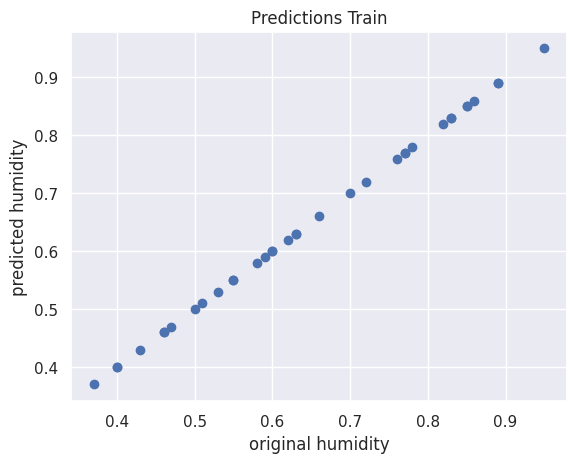

In [ ]:
#visualization of comparison of real values y with predicted values y (train-dataset)

plt.scatter(y_train, yhat_train)
plt.title("Predictions Train")
plt.xlabel("original humidity")
plt.ylabel("predicted humidity")
plt.show()

In [ ]:
# evaluate pred score (train-dataset)
from sklearn.metrics import r2_score
r2_score(y_train,yhat_train)

1.0

In [ ]:
#test-datasets
#predict values (test-dataset)
yhat_test = reg.predict(X_test)

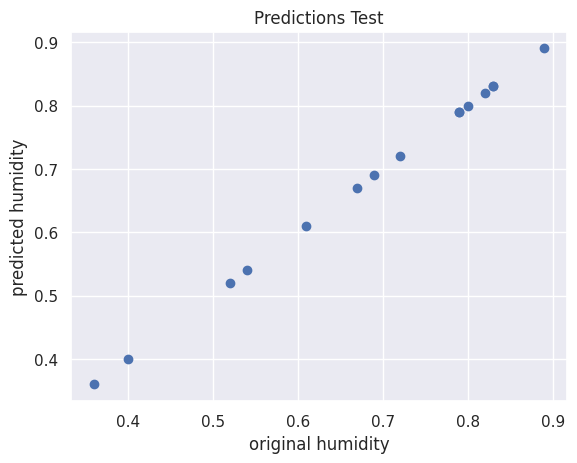

In [ ]:
#visualization of comparison of real values y with predicted values y (test-dataset)
plt.scatter(y_test, yhat_test)
plt.title("Predictions Test")
plt.xlabel("original humidity")
plt.ylabel("predicted humidity")
plt.show()

In [ ]:
# evaluate pred score (test-dataset)
r2_score(y_test,yhat_test)

1.0

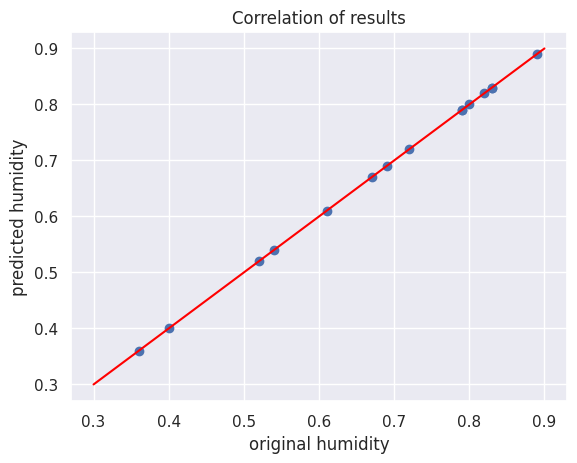

In [ ]:
#visualization of comparison of real values y with predicted values y (test-dataset) with correlation line
plt.scatter(y_test, yhat_test)
plt.title("Correlation of results")
plt.xlabel("original humidity")
plt.ylabel("predicted humidity")
vv=[0.3,0.3,0.6,0.9]
plt.plot(vv,vv, color='red')
plt.show()


In [ ]:
#evaluate Mean Square Error
mse=metrics.mean_squared_error(y_test,yhat_test)
mse

1.5202007027696582e-32

# Causality Diagramm

In [ ]:
df_weather

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83
5,9.222222,13.9587,1016.66,0.85
6,7.733333,12.3648,1016.72,0.95
7,8.772222,14.1519,1016.84,0.89
8,10.822222,11.3183,1017.37,0.82
9,13.772222,12.5258,1017.22,0.72


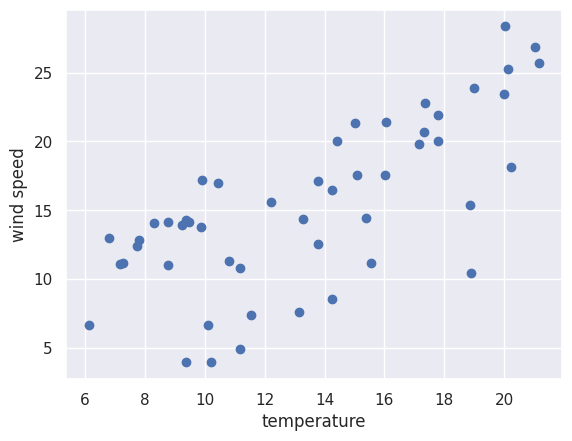

In [ ]:
# check correlation between windspeed and temperature

plt.scatter(X['Temperature (C)'],X['Wind Speed (km/h)'])
plt.xlabel("temperature")
plt.ylabel("wind speed")
plt.show()

In [ ]:
#when temperature increases windspeed increases. When windspeed increases, temperature increases.
#when windspeed or temperature increase humidity decreases.
#when humidity increases, temperature and windspeed decrease.

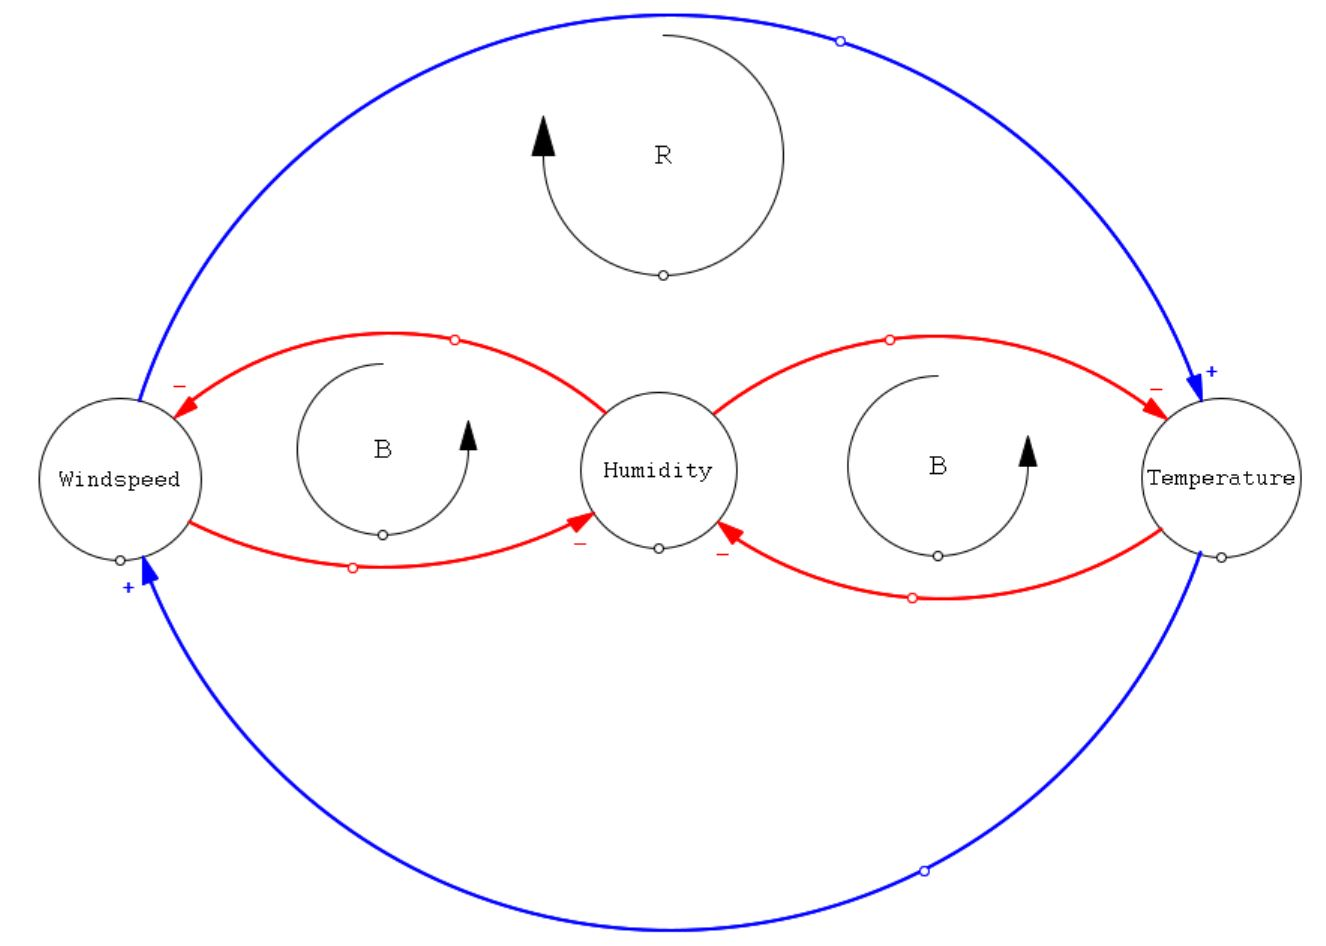

# binary logistic regression

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSVs/diabetes_binary_health_indicators_BRFSS2015.csv')
df = pd.DataFrame(data)
df=df.sample(random_state=1, frac=.3)

In [ ]:
#comments:

#license: CC0: Public Domain
# coverage: The survey was established in 1984. Data are collected monthly in all 50 states, Puerto Rico, the U.S. Virgin islands, and Guam.
#authors: The underlying uncleaned data comes from the CDC's BRFSS 2015

In [ ]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
235899,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
74852,1.0,0.0,0.0,1.0,22.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,9.0,6.0,8.0
8205,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0
127632,1.0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0,6.0,5.0
32021,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26329,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,7.0,7.0,0.0,1.0,7.0,6.0,7.0
44372,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,8.0,6.0,6.0
78540,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
71043,0.0,0.0,1.0,1.0,31.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76104 entries, 235899 to 253509
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       76104 non-null  float64
 1   HighBP                76104 non-null  float64
 2   HighChol              76104 non-null  float64
 3   CholCheck             76104 non-null  float64
 4   BMI                   76104 non-null  float64
 5   Smoker                76104 non-null  float64
 6   Stroke                76104 non-null  float64
 7   HeartDiseaseorAttack  76104 non-null  float64
 8   PhysActivity          76104 non-null  float64
 9   Fruits                76104 non-null  float64
 10  Veggies               76104 non-null  float64
 11  HvyAlcoholConsump     76104 non-null  float64
 12  AnyHealthcare         76104 non-null  float64
 13  NoDocbcCost           76104 non-null  float64
 14  GenHlth               76104 non-null  float64
 15  MentHlth     

In [ ]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

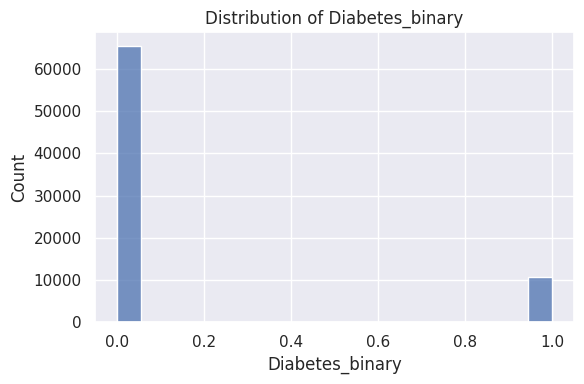

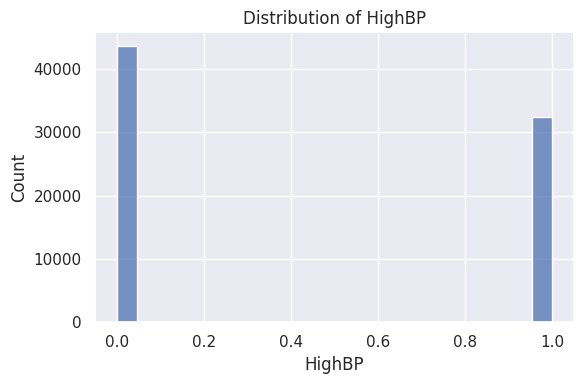

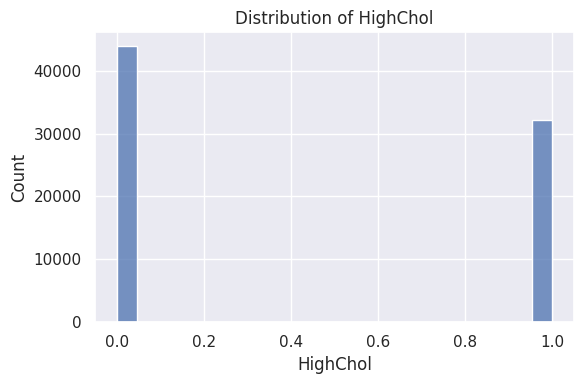

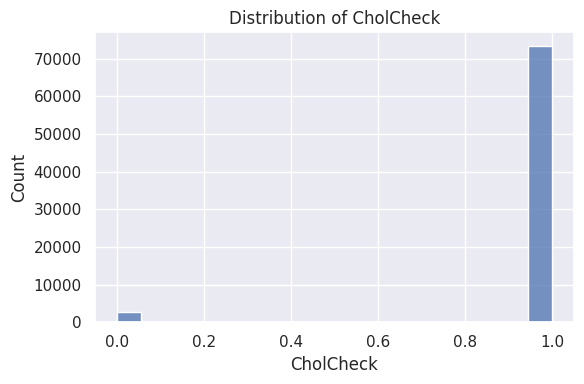

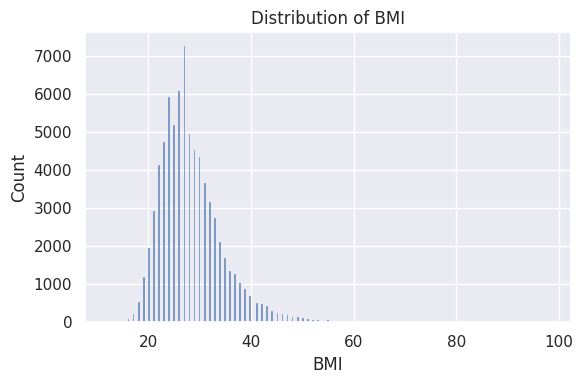

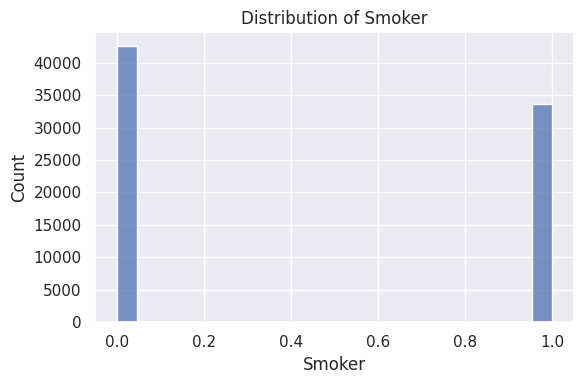

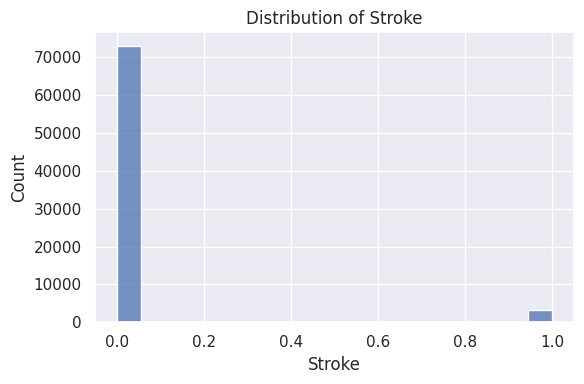

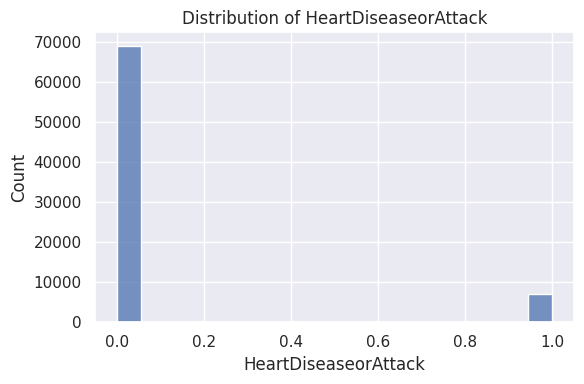

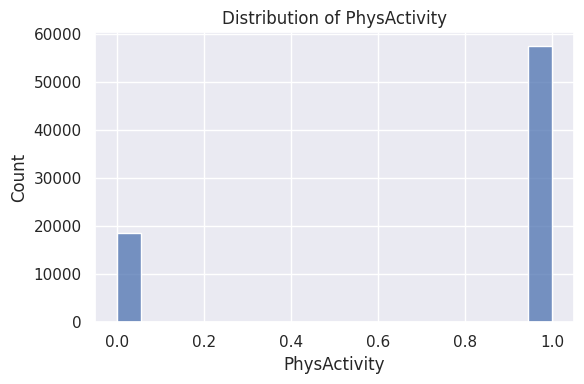

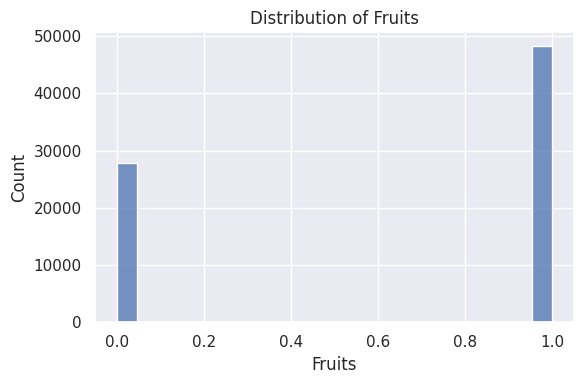

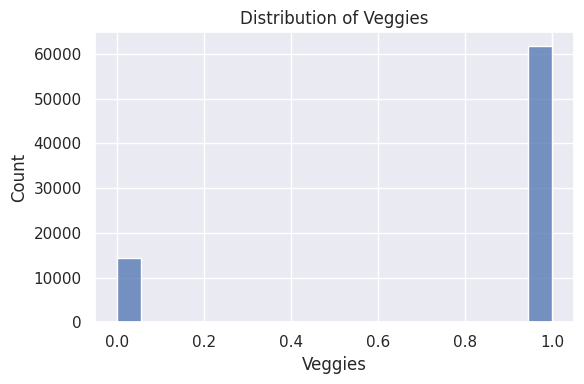

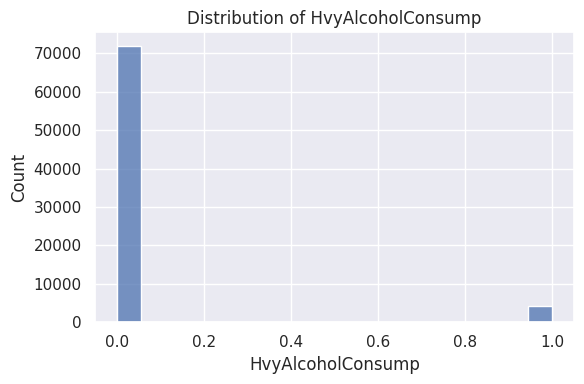

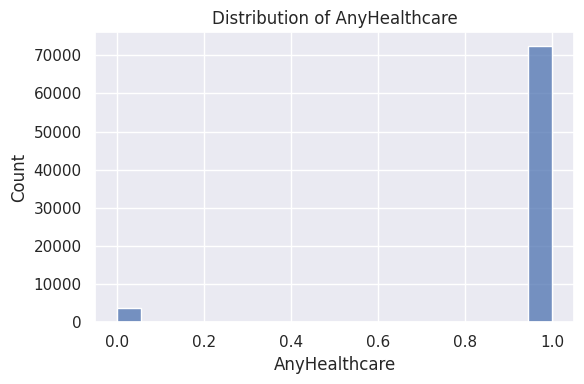

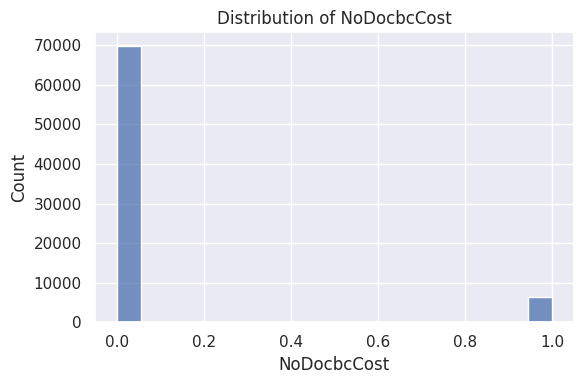

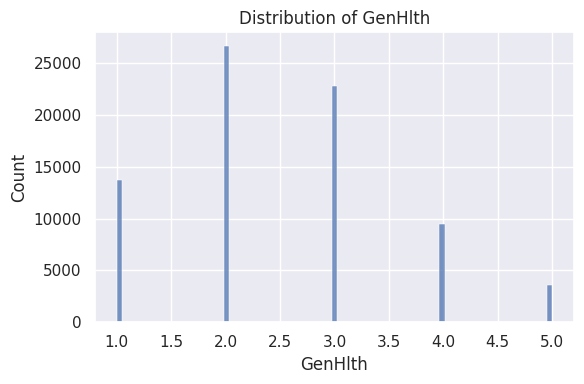

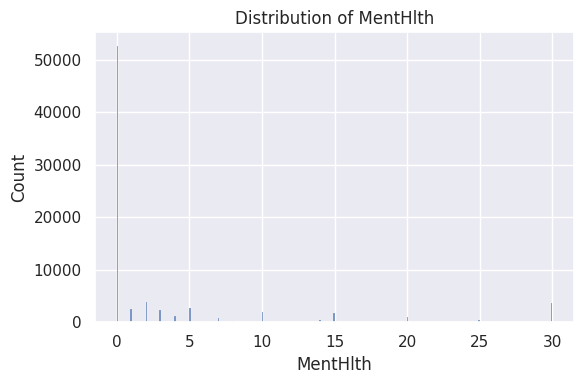

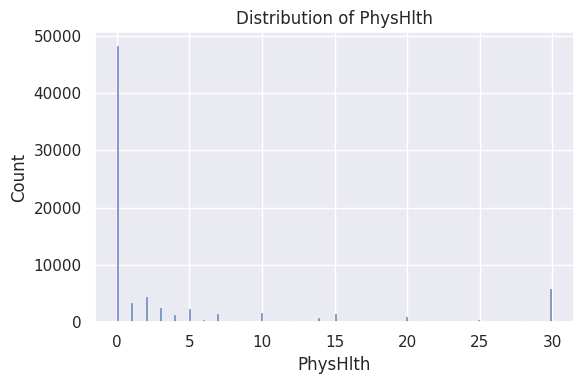

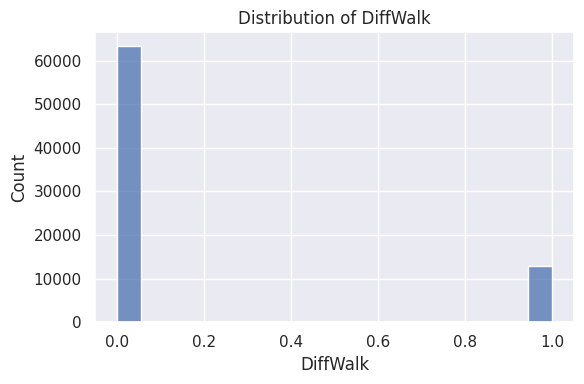

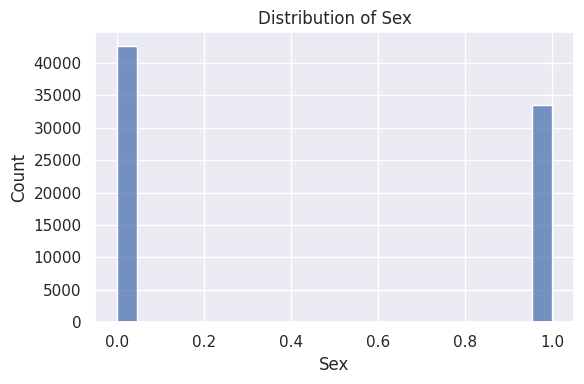

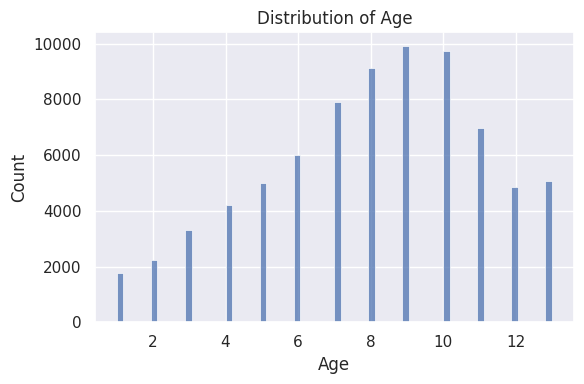

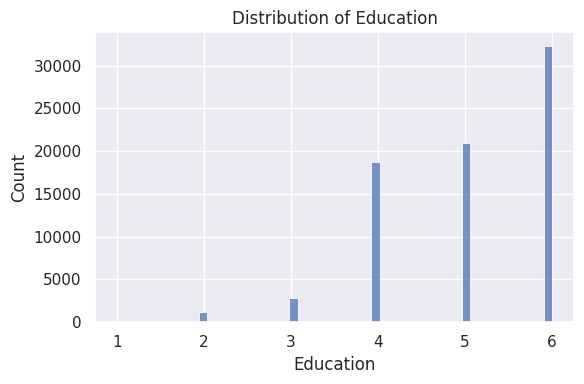

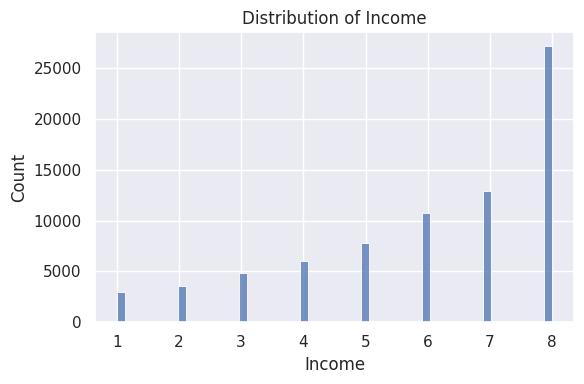

In [ ]:
# Visulizations:

#general distribution
# ---> loop

for column in df.select_dtypes(include='number').columns:

    sns.set(style="darkgrid")
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

    # do some assumptions about the distributions?


In [ ]:
#BMI, MentHealth, PhysHealth, GenHealth, HeartDiseaseorAttack, Age, Education, Income, Diabetes_binary,
# eventuell plotly

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

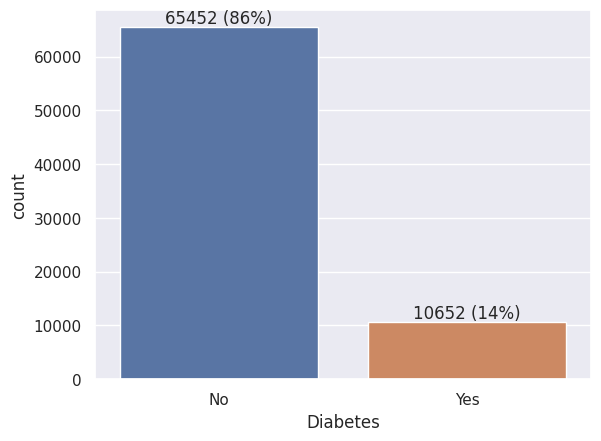

In [ ]:
ax=sns.countplot(x='Diabetes_binary', data=df)
abs_values = df['Diabetes_binary'].value_counts(ascending=False)
rel_values = df['Diabetes_binary'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_xlabel('Diabetes')
ax.set_xticklabels(['No', 'Yes'])

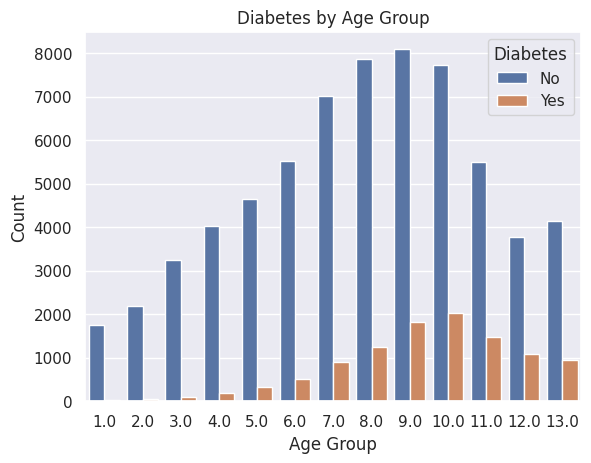

In [ ]:
sns.countplot(x=df['Age'], hue=df['Diabetes_binary'], data=df)
plt.title('Diabetes by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

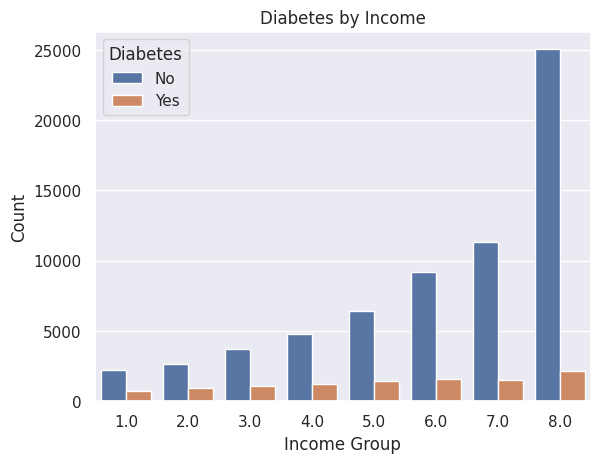

In [ ]:
sns.countplot(x=df['Income'], hue=df['Diabetes_binary'], data=df)
plt.title('Diabetes by Income')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

In [ ]:
bins = [15, 18.5, 25, 30, 35, 40]  # BMI-Kategorien gemäß den gängigen Definitionen
labels = ['underweight', 'normalweight', 'overweight', 'adipositas  I', 'adipositas  II']
df['bmi_group'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

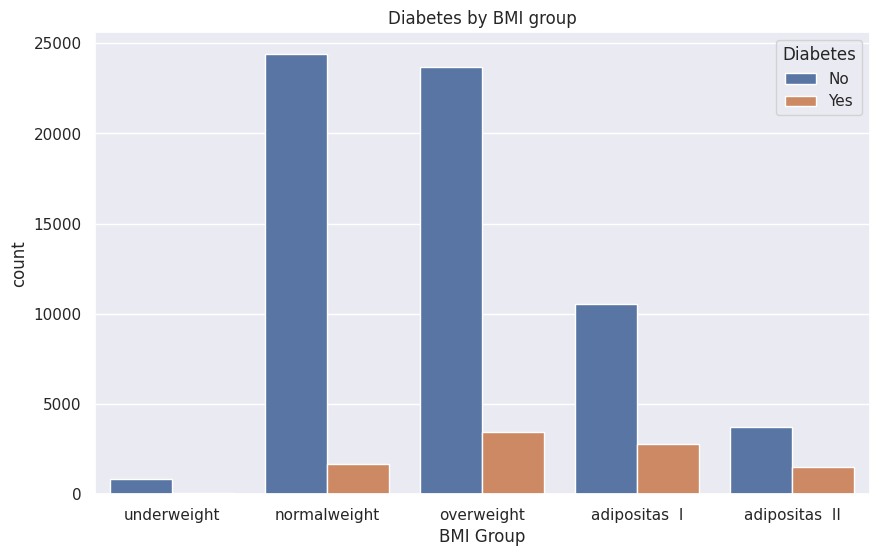

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='bmi_group', hue='Diabetes_binary', data=df, order=labels)
plt.title('Diabetes by BMI group')
plt.ylabel('count')
plt.xlabel('BMI Group')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

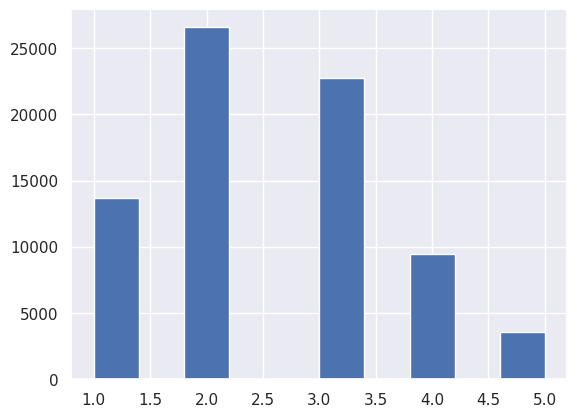

In [ ]:
plt.hist(df['GenHlth'])
plt.show()

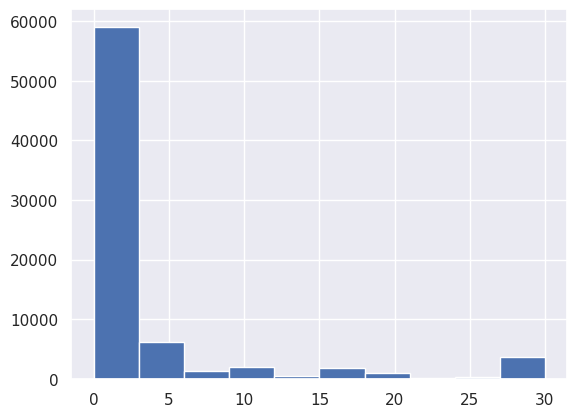

In [ ]:
plt.hist(df['MentHlth'])
plt.show()

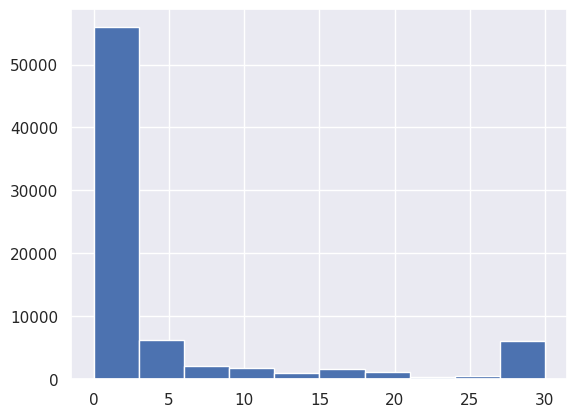

In [ ]:
plt.hist(df['PhysHlth'])
plt.show()

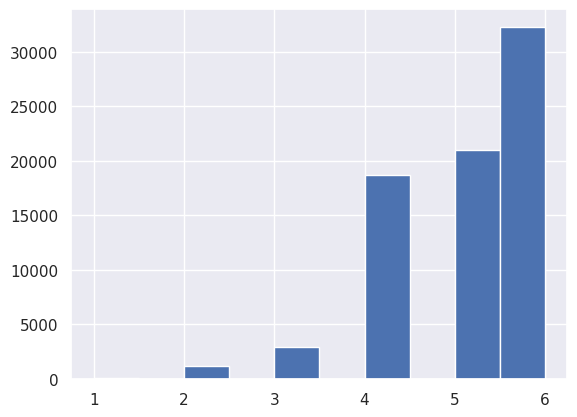

In [ ]:
plt.hist(df['Education'])
plt.show()

In [ ]:
bin_df = df[['Diabetes_binary','BMI','Age','Education','Income', 'GenHlth','MentHlth','PhysHlth']]

bin_df


,Diabetes_binary,BMI,Age,Education,Income,GenHlth,MentHlth,PhysHlth
235899,0.0,23.0,13.0,6.0,6.0,2.0,0.0,0.0
74852,1.0,22.0,9.0,6.0,8.0,2.0,0.0,5.0
8205,0.0,26.0,11.0,4.0,6.0,2.0,0.0,0.0
127632,1.0,39.0,11.0,6.0,5.0,4.0,0.0,0.0
32021,0.0,22.0,10.0,6.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26329,0.0,27.0,7.0,6.0,7.0,3.0,7.0,7.0
44372,0.0,24.0,8.0,6.0,6.0,1.0,0.0,1.0
78540,0.0,28.0,10.0,5.0,6.0,3.0,0.0,0.0
71043,0.0,31.0,9.0,6.0,8.0,1.0,0.0,0.0


In [ ]:
corr_bin = bin_df.corr()
corr_bin

,Diabetes_binary,BMI,Age,Education,Income,GenHlth,MentHlth,PhysHlth
Diabetes_binary,1.000000,0.215871,0.181730,-0.125267,-0.168230,0.292696,0.067758,0.171292
BMI,0.215871,1.000000,-0.036057,-0.104901,-0.098081,0.240146,0.091260,0.119938
Age,0.181730,-0.036057,1.000000,-0.100405,-0.125071,0.151584,-0.095709,0.095063
Education,-0.125267,-0.104901,-0.100405,1.000000,0.449261,-0.287024,-0.099553,-0.156833
Income,-0.168230,-0.098081,-0.125071,0.449261,1.000000,-0.369433,-0.207119,-0.267895
GenHlth,0.292696,0.240146,0.151584,-0.287024,-0.369433,1.000000,0.298430,0.524713
MentHlth,0.067758,0.091260,-0.095709,-0.099553,-0.207119,0.298430,1.000000,0.353981
PhysHlth,0.171292,0.119938,0.095063,-0.156833,-0.267895,0.524713,0.353981,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
diabetes_bin_pred = smf.logit(formula = 'Diabetes_binary ~Age + Education+ BMI + Income + GenHlth+ MentHlth + PhysHlth', data= bin_df)
binary=diabetes_bin_pred.fit()

Optimization terminated successfully.
         Current function value: 0.336118
         Iterations 7


In [ ]:
binary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:                76104
Model:                          Logit   Df Residuals:                    76096
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.1699
Time:                        11:12:21   Log-Likelihood:                -25580.
converged:                       True   LL-Null:                       -30815.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9210      0.104    -66.647      0.000      -7.125      -6.717
Age            0.1977      0.005     43.821      0.000       0.189       0.207
Education     -0.0345      0.012     -2.814      0.005      -0.058      -0.010
BMI            0.0702      0.002     45.081      0.000       0.067       0.073
Income        -0.0590      0.006     -9.720      0.000      -0.071      -0.047
GenHlth        0.6548      0.014     46.969      0.000       0.627       0.682
MentHlth      -0.0031      0.002     -2.074      0.038      -0.006      -0.000
PhysHlth      -0.0051      0.001     -3.825      0.000      -0.008      -0.003
==============================================================================
"""

Odds for the different features

In [ ]:
coef=binary.params
print(np.exp(coef))

Intercept    0.000987
Age          1.218617
Education    0.966128
BMI          1.072728
Income       0.942661
GenHlth      1.924802
MentHlth     0.996870
PhysHlth     0.994867
dtype: float64


* increase of one unit in Age equals increase in Odds for HeartDiseaseorAttack 1,22 times
* as education increases by one unit, the odds for having HDA decrease by 4%
* as BMI increases by one unit, the odds for having HDA increase by
* as Income increases by one unit, the odds for having HDA decrease by 6%
* as General Health increases, the odds for having HDA increase by almost 100%
* as Mental Health increases by one unit, the odds for having HDA decrease by <1 %
* as Physical Health increases by one unit, the odds for having HDA decrease by <1 %

# Classification


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

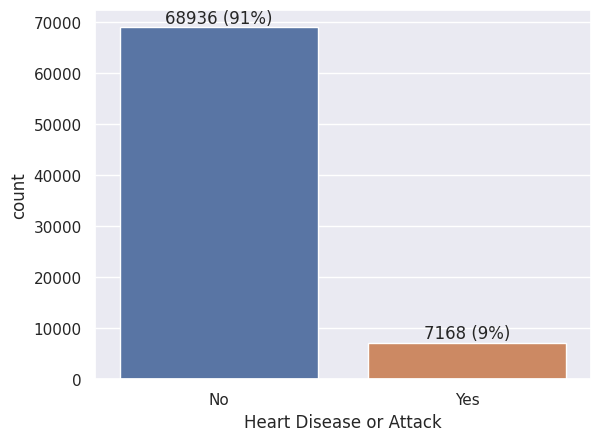

In [ ]:
ax= sns.countplot(x='HeartDiseaseorAttack', data=df)
abs_values = df['HeartDiseaseorAttack'].value_counts(ascending=False)
rel_values = df['HeartDiseaseorAttack'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_xlabel('Heart Disease or Attack')
ax.set_xticklabels(['No', 'Yes'])

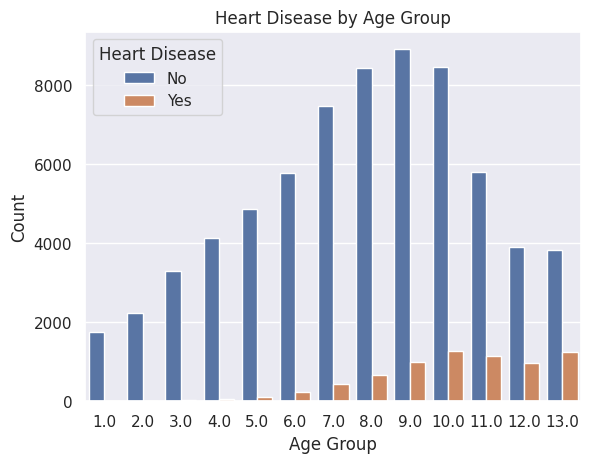

In [ ]:
sns.countplot(x=df['Age'], hue=df['HeartDiseaseorAttack'], data=df)
plt.title('Heart Disease by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

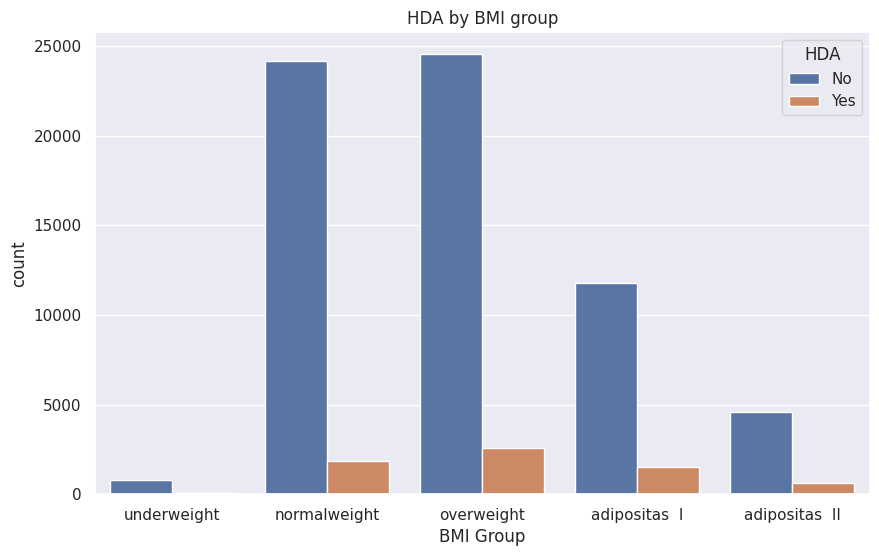

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='bmi_group', hue='HeartDiseaseorAttack', data=df, order=labels)
plt.title('HDA by BMI group')
plt.ylabel('count')
plt.xlabel('BMI Group')
plt.legend(title='HDA', labels=['No', 'Yes'])
plt.show()

In [ ]:

#1. daten aufteilen feature + target
#2. daten splitten test vs. train
#3. daten dann mit 3 neighbors probieren
#4. daten dann probieren
del df['bmi_group']
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76104 entries, 235899 to 253509
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       76104 non-null  float64
 1   HighBP                76104 non-null  float64
 2   HighChol              76104 non-null  float64
 3   CholCheck             76104 non-null  float64
 4   BMI                   76104 non-null  float64
 5   Smoker                76104 non-null  float64
 6   Stroke                76104 non-null  float64
 7   HeartDiseaseorAttack  76104 non-null  float64
 8   PhysActivity          76104 non-null  float64
 9   Fruits                76104 non-null  float64
 10  Veggies               76104 non-null  float64
 11  HvyAlcoholConsump     76104 non-null  float64
 12  AnyHealthcare         76104 non-null  float64
 13  NoDocbcCost           76104 non-null  float64
 14  GenHlth               76104 non-null  float64
 15  MentHlth     

In [ ]:
# split data into features and target
#features
x=df.loc[:, df.columns != 'HeartDiseaseorAttack']


#target
y=df['HeartDiseaseorAttack']


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
knn.score(x_test,y_test)

0.8892782060266293

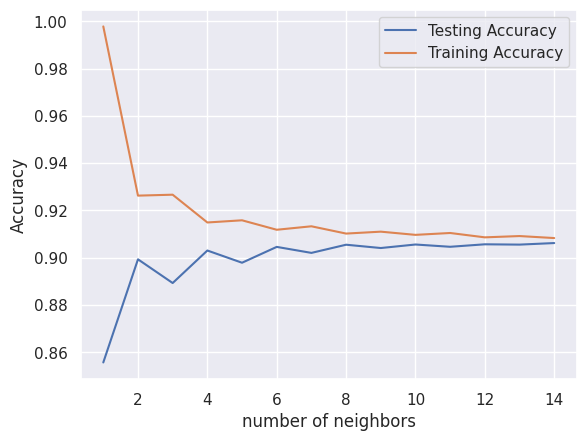

In [ ]:
# need interception -> similar accuracy ( biggest one are the best) ->  maybe change parameters, methods = minkowsky = 1,2 or 3
neighbors = np.arange(1,15)

train_accuracy = np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy [i]=knn_model.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label ='Testing Accuracy')
plt.plot(neighbors , train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

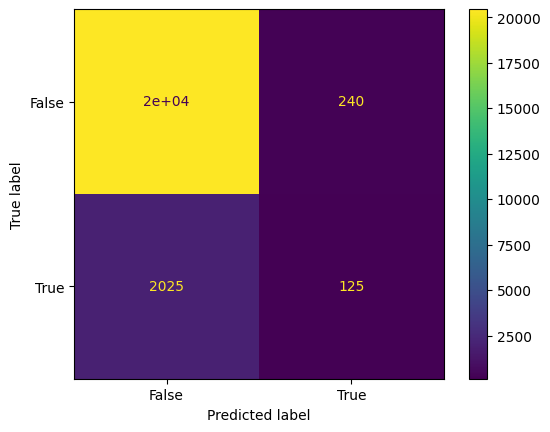

In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred)
conf1=metrics.ConfusionMatrixDisplay(conf,display_labels = [False, True])
conf1.plot()
plt.show()

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)
percentagecm=np.round(cm/sum(sum(cm))*100,2)
print("Confusion Matrix in %: \n",percentagecm)

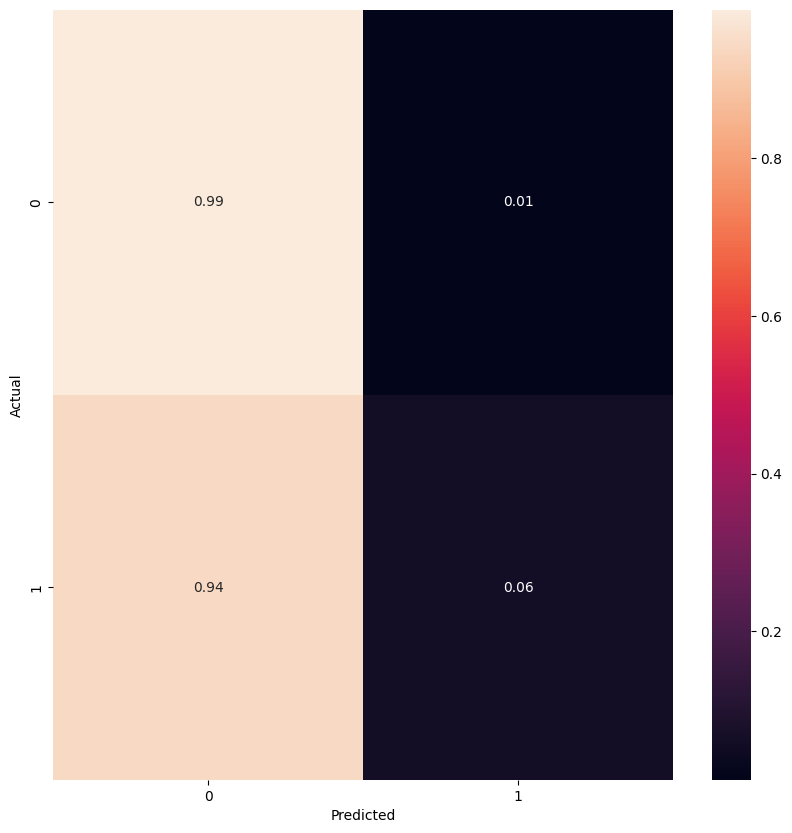

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
neighbors = np.arange(1,15)

train_accuracy = np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_model.fit(x_train,y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy [i]=knn_model.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label ='Testing Accuracy')
plt.plot(neighbors , train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors: entscheidet wie viele Neighbors wir ranken
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
knn.fit(x_train,y_train)

In [ ]:
y_predict = knn.predict(x_test)
y_predict

In [ ]:
knn.score(x_test,y_test)

# Clustering (Dataset Wine)

# Normal Clustering

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

#load wine dataset
wine = load_wine()

kmn = KMeans(n_clusters=4) #number of groups/cluster (create)
kmn.fit(wine.data) # fit model
labels = kmn.predict(wine.data) # predicition

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([0, 0, 3, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 2, 2,
       0, 0, 2, 2, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [ ]:
#example prediction for cluster
x_new = np.array([1,1,2,5,2,5,3,4,5,6,7,9,9])
kmn.predict([x_new])

array([1], dtype=int32)

In [ ]:
# Convert to dataframe
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


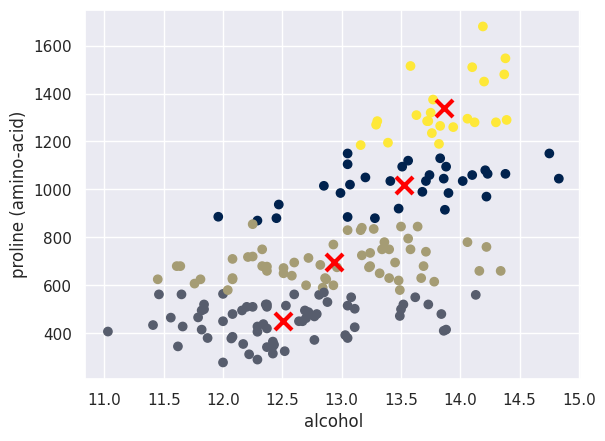

In [ ]:
#show clusters and defined centers (12 =proline, 9=color_intensity)
# the more proline, the more alcohol and vice versa (four clusters: few, middle, a lot)
#pro: clearer distinctions / con: higher inertia, less details

from matplotlib import cm

xs = wine.data[:,0]
ys = wine.data[:,12]

centroids = kmn.cluster_centers_
plt.scatter(xs, ys, c=labels, cmap = cm.cividis)
plt.scatter(centroids[:,0],centroids[:,12], marker='x', linewidth=3, s=150, c='red')
plt.xlabel("alcohol")
plt.ylabel("proline (amino-acid)")
plt.show()

In [ ]:
#Inertia: shows total distance from each sample to centroid in a cluster (how wide clusters are spread) -> lower= better
kmn.inertia_

1331903.062263718

In [ ]:
#check if best number for clusters is valid/best option (k)

inertia_list = []
for k in np.arange(1,19):
  kmn = KMeans(n_clusters=k)
  kmn.fit(wine.data)
  inertia_list.append(kmn.inertia_)
inertia_list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[17592296.383508474,
 4543749.614531861,
 2370689.686782969,
 1333139.2086165317,
 916379.1871539169,
 647326.0020260848,
 412137.5091004584,
 323223.24705426686,
 271036.26645484107,
 217887.37856033302,
 187069.17928521684,
 164146.35799093777,
 140834.6798946128,
 122270.52994319098,
 114981.72706658594,
 101799.68939902638,
 93010.989865576,
 85048.35591571289]

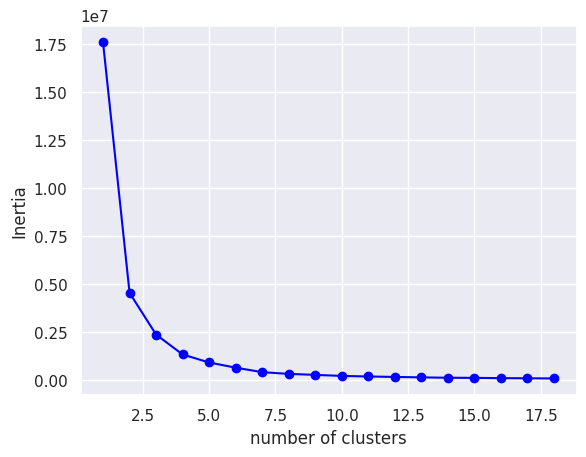

In [ ]:
# visualize best k with elbow method (3/4)

plt.plot(np.arange(1,19), inertia_list, 'o-',c = 'blue')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

# Hierarchical Clustering

In [ ]:
#hierarchical clustering -> builds cluster hierarchy until there is only one cluster left
# complete method - defines the distance between two clusters as the maximum distance between any two points in the clusters.

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
hir = linkage(wine.data, method='complete')

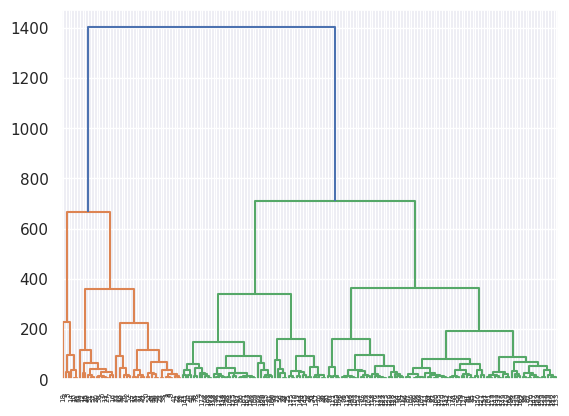

In [ ]:
#visualization of hierarchical clustering
dendrogram(hir, leaf_rotation=90)
plt.show()

In [ ]:
#no two cluster elements should have a greater distance than 4
labels = fcluster(hir, 4, criterion='distance')
print(labels)

[ 30  38  21   1  51   2  16  17  37  37   3  14   7  20   5   8  18  25
   6  82  44  42  39  35  84  81  23  15  86  40  12   4  74  24  27  87
  90  29  36  46  45  41  28  61  91  34  32  75  33  11  20   9  22  19
  31  26  76  10  13 127  62 141 162 101 119  65 122 121  49  73  92 100
 135  77  88 106 113 144  47 139  93  70 160 130 128 142 123 149  57 161
 137 143 125  94 117  78 159 104  52  98  71 148 107 102  58  95 121 126
  96  66 153  97 169 105 112  99 124 118 114 148 163 146 120 109 111 110
 115 140 116 167 156 134 150 170  54  59  68 131 168 172 171  43 132 152
  83  85 103 166  55 155 145 147 108  67 158  69 138  89  56 164 129  63
 154  64 165 129  72  60  48 157 133 136  53  50  48  79  80 151]


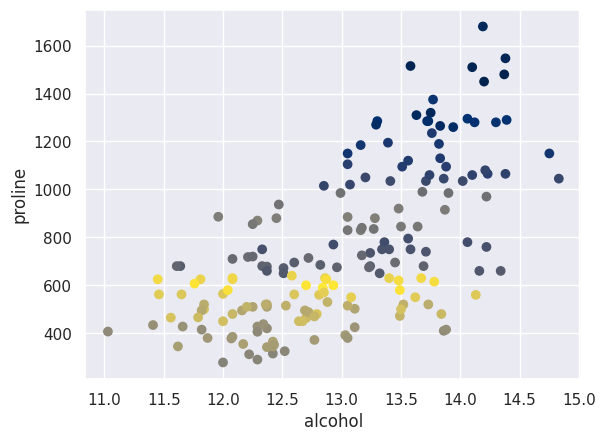

In [ ]:
# visualization hierarchical clustering
#dynamic clustering -> different points are located at different classes for different levels
#pro: more detailed, less inertia / con: unclear distinctions

plt.scatter(wine.data[:,0], wine.data[:,12], c=labels, cmap = cm.cividis)
plt.xlabel("alcohol")
plt.ylabel("proline")
plt.show()

In [ ]:
inertia_list = []
for k in np.arange(1,19):
  kmn = KMeans(n_clusters=k)
  kmn.fit(wine.data)
  inertia_list.append(kmn.inertia_)
inertia_list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[17592296.383508474,
 4543749.614531861,
 2370689.686782969,
 1332043.8610845525,
 916379.1871539169,
 647326.0020260848,
 412303.8282508012,
 323223.24705426686,
 270144.00195345,
 217887.37856033302,
 188666.19192062988,
 171092.98726794188,
 140934.45366784124,
 123547.67930918235,
 110229.76216008389,
 102568.28716657269,
 91692.6764576867,
 82868.50984154386]

In [ ]:
#Inertia: shows total distance from each sample to centroid in a cluster (how wide clusters are spread) -> lower= better
kmn.inertia_

82868.50984154386